In [1]:
from clustering.preprocess import Preprocess
from clustering.kmeans import KMeansClustering
from clustering.lda import LDA
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
data = Preprocess.open_pickle("F:\Development\smart_rejector_for_hate_speech\/twitter_data.pkl")
filtered_data = Preprocess.filter_waseem_hovy(X=data, label='racism')
tweets = [x['text'] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 16089
INFO:root:After applying filters: 1937
INFO:root:Data length after removing invalid tweets: 47
INFO:root:Explained variance of the SVD step: 100%


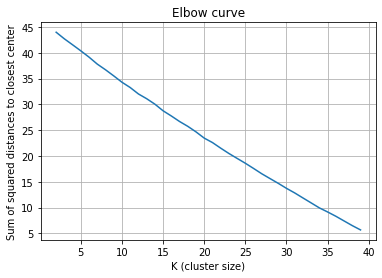

In [3]:
%matplotlib inline
km.plot_elbow_curve(max_k=40, X=X)

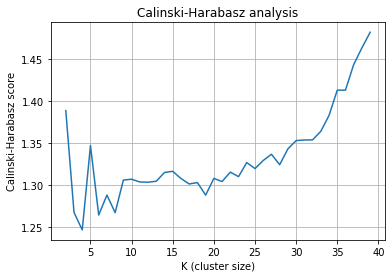

In [4]:
%matplotlib inline
# Higher values are better, when clusters are dense and well separated
km.plot_calinski_harabasz_analysis(max_k=40, X=X)

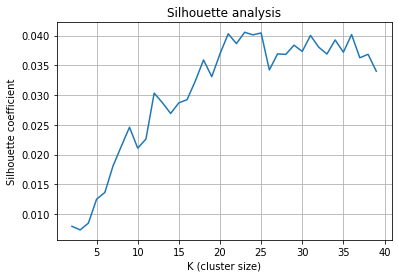

In [5]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=40, X=X)

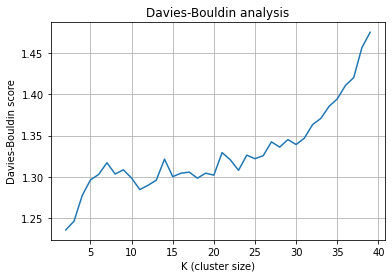

In [6]:
%matplotlib inline
# Values close to zero indicate a better partition
km.plot_davies_bouldin_score_analysis(max_k=40, X=X)

In [7]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 paris real people cult journalists death criticizing murdered murders officers

Cluster 1:
 isis shia militia like watching mosul murder beat peshmerga trench

Cluster 2:
 religion islam muslims designed work non hands loot rape women

Cluster 3:
 speech problem girls free violence avoiding freedom make election real

Cluster 4:
 sun cleric earth saudi revolves skill madrassa understand graduates jihad



In [8]:
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=5)

Cluster 0: most representative sample indices: [22  4 41 26 23]
{'text': 'as long as we make feel good lectures and demonstrations about freedom of speech we are avoiding the real problem - the violence of islam.', 'label': 'racism'}

{'text': 'our politicians make inane speeches about freedom of speech while studiously avoiding the real source of the problem ,  the violence in #islam', 'label': 'racism'}

{'text': 'it is not about satire or free speech.  pretending it is will solve nothing.  the problem is that the quran is full of incitement for murder.', 'label': 'racism'}

{'text': 'we would be much better off figuring out what to do about islamofascim than ranting about freedom of speech or who went to paris. #islam', 'label': 'racism'}

{'text': 'will any of the media talking heads ever broach the subject that #islam is incompatible with free speech and democracy ?  are they pc cowards ?', 'label': 'racism'}


Cluster 1: most representative sample indices: [ 2 34 45 40 20]
{'text

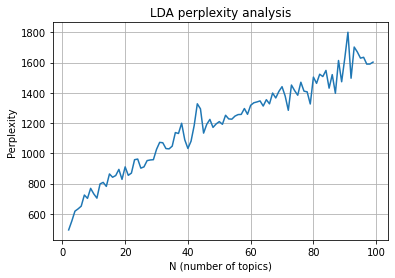

In [9]:
lda = LDA()
X = lda.fit_tf(X=cleaned_data)
pred = lda.fit_lda(X=X, n_components=2)
# Lower values are better
# Perplexity indicates how well the probability model predicts the samples
lda.plot_perplexity(max_n=100, X=X)

In [10]:
lda = LDA()
X = lda.fit_tf(X=cleaned_data)
pred = lda.fit_lda(X=X, n_components=10)
lda.print_top_terms()

Topic:  0
['work', 'killing', 'religion', 'designed', 'buddhists', 'islam', 'mecca', 'smash', 'pray', 'kabba']
Topic:  1
['isis', 'speech', 'barbarity', 'mohammed', 'mosul', 'free', 'media', 'make', 'year', 'old']
Topic:  2
['years', 'does', 'getting', 'need', 'earth', 'cleric', 'saudi', 'sun', 'jihad', 'rid']
Topic:  3
['paris', 'people', 'real', 'muslim', 'excuses', 'terror', 'happening', 'making', 'recognize', 'bad']
Topic:  4
['death', 'problem', 'murder', 'journalists', 'hatred', 'allah', 'day', 'level', 'cult', 'quran']
Topic:  5
['islam', 'muslims', 'murder', 'shia', 'religion', 'like', 'non', 'paris', 'muslim', 'hands']
Topic:  6
['isis', 'trench', 'religion', 'pedophile', 'murder', 'big', 'battles', 'battle', 'imitate', 'trick']
Topic:  7
['isis', 'shia', 'militia', 'girls', 'like', 'watching', 'peshmerga', 'beat', 'just', 'use']
Topic:  8
['islam', 'muslims', 'speech', 'terrorist', 'freedom', 'non', 'make', 'long', 'avoiding', 'violence']
Topic:  9
['islam', 'prophet', 'elect